# Designing Markov chains

How can we design a Markov chain such that it converges to a given distribution $\pi(s)$ over states $s$?
The idea is to design the chain such that it has a **stationary distribution** to which it converges after a long time, and such that that stationary distribution is equal to $\pi$.

To do so, we need to find (design) suitable transition probabilities $p(s \to t)$ of jumping from a state $s$ to a state $t$.

The simplest design method is to impose the **detailed balance** criterion,

$$\pi(s) p(s \to t) = \pi(t) p(t \to s) \quad \forall s, t,$$

which says that the flow of probability between any two states is equal, and hence that there is an equilibrium between any two states. 
[This is not a necessary condition: there are MCMC methods that impose only the weaker "balance" condition that the *total* flow into and out of a given state should be equal.]

This then imposes a condition on the ratio
$$\frac{p(s \to t)}{p(t \to s)} = \frac{\pi(t)}{\pi(s)}.$$

Note that the normalization constant disappears in this ratio of values of $\pi$, so that we can design a chain for a distribution whose normalization constant we don't know.

There are many ways to solve this underdetermined set of equations. The Metropolis solution is the following. 

We split up $p(s \to t)$ into $g(s \to t) \cdot \alpha(s \to t)$, where $g(s \to t)$ is the probability of proposing (generating) the state $t$ from the state $s$, and $\alpha(s \to t)$ is the probability of accepting the move.

If $g$ is symmetric, such that $g(s \to t) = g(t \to s)$ for all $s, t$, then we have

$$\frac{\alpha(s \to t)}{\alpha(t \to s)} = \frac{\pi(t)}{\pi(s)}.$$

We attempt to maximise the acceptance ratio $\alpha(s \to t)$ by putting it equal to $1$ when possible. The solution is

$$\alpha(s \to t) = \max \left[ 1, \frac{\pi(s)}{\pi(t)} \right].$$

Note that this choice implies that the probability of going "downhill" (to a less likely state) is 1.

See also [this Wikipedia article](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) and e.g. the book by Newman & Barkema, Monte Carlo Methods in Statistical Physics.

## Code for simplest Metropolis MCMC

In [2]:
"""Generate a distribution looking like the (unnormalised) function f using MCMC"""
function MCMC(f, N=100000)

    data = Float64[]
    
    x = 0.0

    for i in 1:N
        x_new = x + 0.1*(rand() - 0.5)  # generate new state locally

        ratio = f(x_new) / f(x)

        if rand() < ratio
            x = x_new
        end

        push!(data, x)
    end
    
    return data
end

MCMC

In [7]:
using Plots
gr()

Plots.GRBackend()

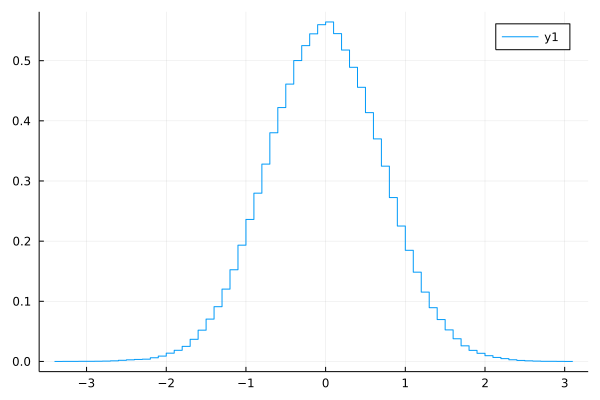

In [8]:
data = MCMC(x->exp(-x^2), 10^7)
histogram(data, normed=true, bins=100)

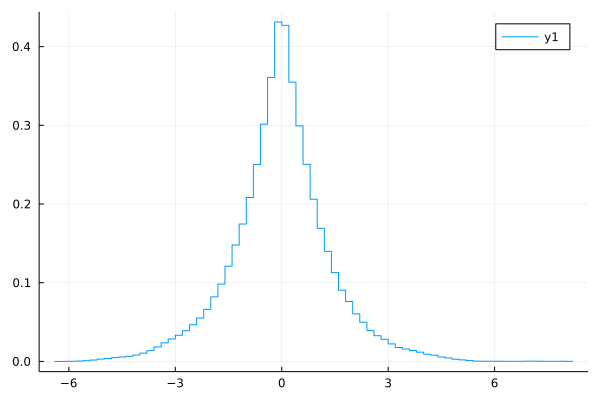

In [5]:
data = MCMC(x->exp(-abs(x)), 10^7)
histogram(data, normed=true, bins=100)

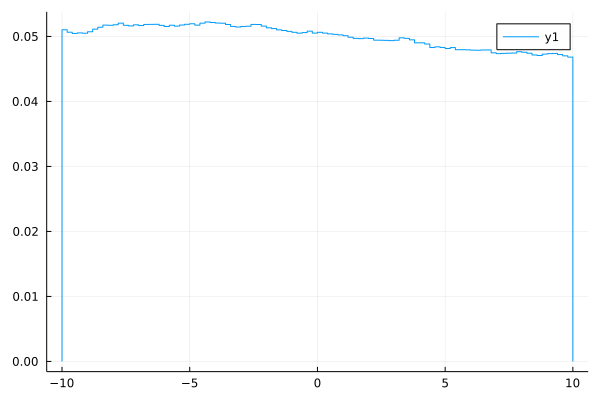

In [6]:
data = MCMC(x->(abs(x)<10 ? 1 : 0), 10^9)
histogram(data, normed=true, bins=100)

In [ ]:
data = MCMC(x->(abs(x)<10 ? x^2+1 : 0), 10^7)
histogram(data, normed=true, bins=100)

In [10]:
data

1000000000-element Array{Float64,1}:
 -0.01073   
 -0.0392436 
 -0.0233078 
 -0.066845  
 -0.0220234 
  0.0179812 
 -0.00588417
  0.0311589 
  0.0553976 
  0.0551316 
  0.0722811 
  0.0831915 
  0.126861  
  ⋮         
  8.27072   
  8.25477   
  8.28446   
  8.24666   
  8.24466   
  8.27376   
  8.24812   
  8.20816   
  8.20128   
  8.18769   
  8.15618   
  8.15794   

In [ ]:
L"x^2"